<h1 style="text-align: center;">Numpy 1</h1>

Библиотека Numpy требует предварительной установки, это можно сделать с помощью менеджера пакетов **pip**

In [1]:
# pip install numpy


После установки импортируем модуль Numpy

In [2]:
import numpy as np


Numpy реализует массивы (ndarray), которые очень похожи на списки (list) в python. Мы можем создать массив на основе списка с помощью команды **np.array()**

In [3]:
a = [1, 2, 3]
print("a: ", type(a))

b = np.array(a)
print("b: ", type(b))

a:  <class 'list'>
b:  <class 'numpy.ndarray'>


Для массивов основные арифметические операции выполняются поэлементно

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print('a+b: ', a+b)
print('a-b: ', a-b)
print('a*b: ', a*b)
print('a/b: ', a/b)
print('a^b: ', a**b)

a+b:  [5 7 9]
a-b:  [-3 -3 -3]
a*b:  [ 4 10 18]
a/b:  [0.25 0.4  0.5 ]
a^b:  [  1  32 729]


Массивы могут быть многомерными, в таком случае их можно рассматривать как "массив массивов"

In [5]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


Узнать размерность массива можно с помощью команды np.shape() или атрибута .shape

In [6]:
print(np.shape(a))
print(a.shape)


(3, 2)
(3, 2)


В некоторых задачах требуется изменить размерность массива, в таком случае используется команда np.reshape()

In [7]:
print(a)
print(np.reshape(a, [2, 3]))

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]


Некоторые функции можно определять для различных осей массива (axis), посмотрим это на примере функции np.max()

In [8]:
print(np.max(a))
print(np.max(a, axis=0))
print(np.max(a, axis=1))

6
[5 6]
[2 4 6]


То же самое можно делать и с суммой

In [9]:
print(np.sum(a))
print(np.sum(a, axis=0))
print(np.sum(a, axis=1))

21
[ 9 12]
[ 3  7 11]


Как и в случае списков доступ к элементам возможен по индексам

In [10]:
print(a)
print(a[0])
print(a[0][1])

[[1 2]
 [3 4]
 [5 6]]
[1 2]
2


Возможны двумерные (в общем случае многомерные) срезы

In [11]:
print(a[:, 1])

[2 4 6]


Наиболее распространены два способа задания массива:
- **np.linspace()**
- **np.arange()**

In [12]:
print(np.linspace(0, 1, 11))
print(np.arange(0, 12.5, 2.5))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.   2.5  5.   7.5 10. ]


Существует возможность задавать массивы различными способами, например, массив нулей, единиц или случайных чисел. В качестве параметра вводим размерность желаемого массива

In [13]:
print(np.zeros(5))
print(np.ones(7))

r = np.random.randn(36)
print(r)

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1.]
[ 0.91694373 -1.37805555  0.46707198 -0.07733085  0.00587803 -0.03830356
 -1.34895227 -0.62361609  0.05111579 -1.47655223 -1.21574721  0.60238843
 -0.99005949  0.00530336  1.0921353   0.24288899 -0.0674632  -1.27187366
 -0.2878951   1.49846743 -0.44116521 -1.24890883  0.49606768  1.23627291
 -0.17084179 -0.26184005  0.65312664 -0.69178911  1.02597753  1.81234786
 -0.12509555  0.16664205  1.10258787  0.46679169 -0.18224068 -0.21850616]


Округление до *k*-го знака после запятой реализуется с помощью **np.round()** с параметром *k*

In [14]:
print(np.round(r, 2))

[ 0.92 -1.38  0.47 -0.08  0.01 -0.04 -1.35 -0.62  0.05 -1.48 -1.22  0.6
 -0.99  0.01  1.09  0.24 -0.07 -1.27 -0.29  1.5  -0.44 -1.25  0.5   1.24
 -0.17 -0.26  0.65 -0.69  1.03  1.81 -0.13  0.17  1.1   0.47 -0.18 -0.22]


---

## Broadcasting

Создадим два массива размерности 5 и 2x3

In [15]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([[1, 2, 3], [4, 5, 6]])

Попробуем умножить один на другой и получим ошибку

In [16]:
# b*a


Идея broadcasting передана на рисунках

![broadcasting](img\broadcasting_1.png)

![broadcasting](img\broadcasting_2.png)

![broadcasting](img\broadcasting_3.png)

![broadcasting](img\broadcasting_4.png)


При работе с двумя массивами Numpy поэлементно сравнивает их размерности. Сравнение начинается с конечного (то есть самого правого) измерения и продолжается влево. 

Два измерения совместимы, когда:

- они равны
- одно из них равно 1

Для того, чтобы сделать внутреннюю размерность равной единице, добавим фиктивную ось с помощью **np.newaxis**

In [17]:
print(b)
print(b[:, :, np.newaxis])

[[1 2 3]
 [4 5 6]]
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


In [18]:
print(a)
print(b)
print(b[:, :, np.newaxis]*a)

[1 2 3 4 5]
[[1 2 3]
 [4 5 6]]
[[[ 1  2  3  4  5]
  [ 2  4  6  8 10]
  [ 3  6  9 12 15]]

 [[ 4  8 12 16 20]
  [ 5 10 15 20 25]
  [ 6 12 18 24 30]]]


---

## Вычисления

Основное удобство связано с возможностью работы со всем массивом целиком.

Например, функция **np.deg2rad()** переводит значения массива/списка из градусов в радианы

In [19]:
deg_list = [45*i for i in range(9)]
print(deg_list)
print(np.deg2rad(deg_list))

[0, 45, 90, 135, 180, 225, 270, 315, 360]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531]


Также существует множество функций для вычисления тригонометрических функций, возведения в степень, численного дифференцирования и интегрирования, работы с преобразованием Фурье и др.

Веселья ради посчитаем сумму первыx $N$ слагаемых функции Вейерштрасса $f(x)=\sum\limits_{n=0}^{\infty}a^n\cos\left(b^n\pi x\right)$ на отрезке $[-2,2]$ при $a=0.5$ и $b=3$. 

Зададим значения параметров и массив "иксов"

In [20]:
N = 20
a = 0.5
b = 3
x = np.linspace(-2, 2, 10000)

Инициализируем наш массив нулём (broadcasting), после чего циклом будем добавлять слагаемые

In [21]:
s = 0
for i in range(N):
    s += a**i*np.cos(b**i*np.pi*x)

Импортируем matplotlib для визуализации

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)

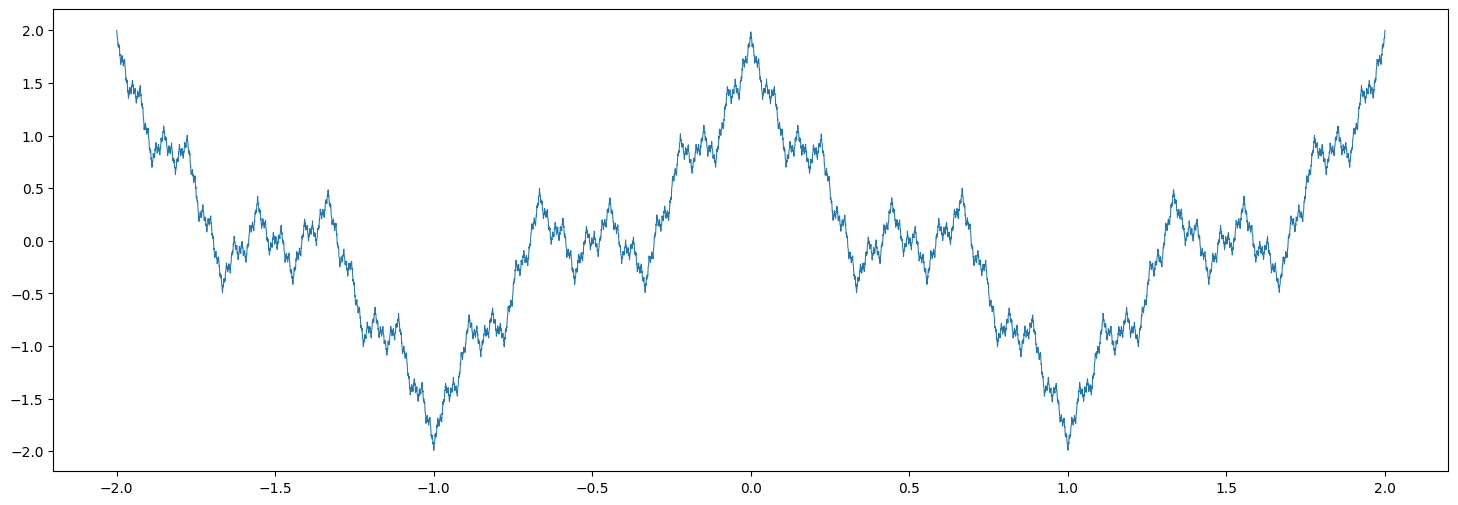

In [23]:
plt.plot(x, s, lw=0.75)